In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_csv('train_data4.csv')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 34 columns):
Movie_Name          134 non-null object
Genre               134 non-null object
critic_rating1      134 non-null int64
user_rating1        134 non-null float64
critic_rating2      134 non-null int64
 user_rating2       134 non-null int64
world_wide_gross    134 non-null int64
Domestic_gross      134 non-null int64
twitter_handles     105 non-null object
views_count         134 non-null int64
likes_count         134 non-null int64
dislikes_count      134 non-null int64
comments_count      134 non-null int64
Action              134 non-null int64
Adventure           134 non-null int64
Animation           134 non-null int64
Biography           134 non-null int64
Comedy              134 non-null int64
Crime               134 non-null int64
Documentory         134 non-null int64
Drama               134 non-null int64
Family              134 non-null int64
Fantasy             134 non-null

In [7]:
del df_train['Movie_Name']
del df_train['twitter_handles']
del df_train['Genre']

In [8]:
corrmat = df_train.corr()

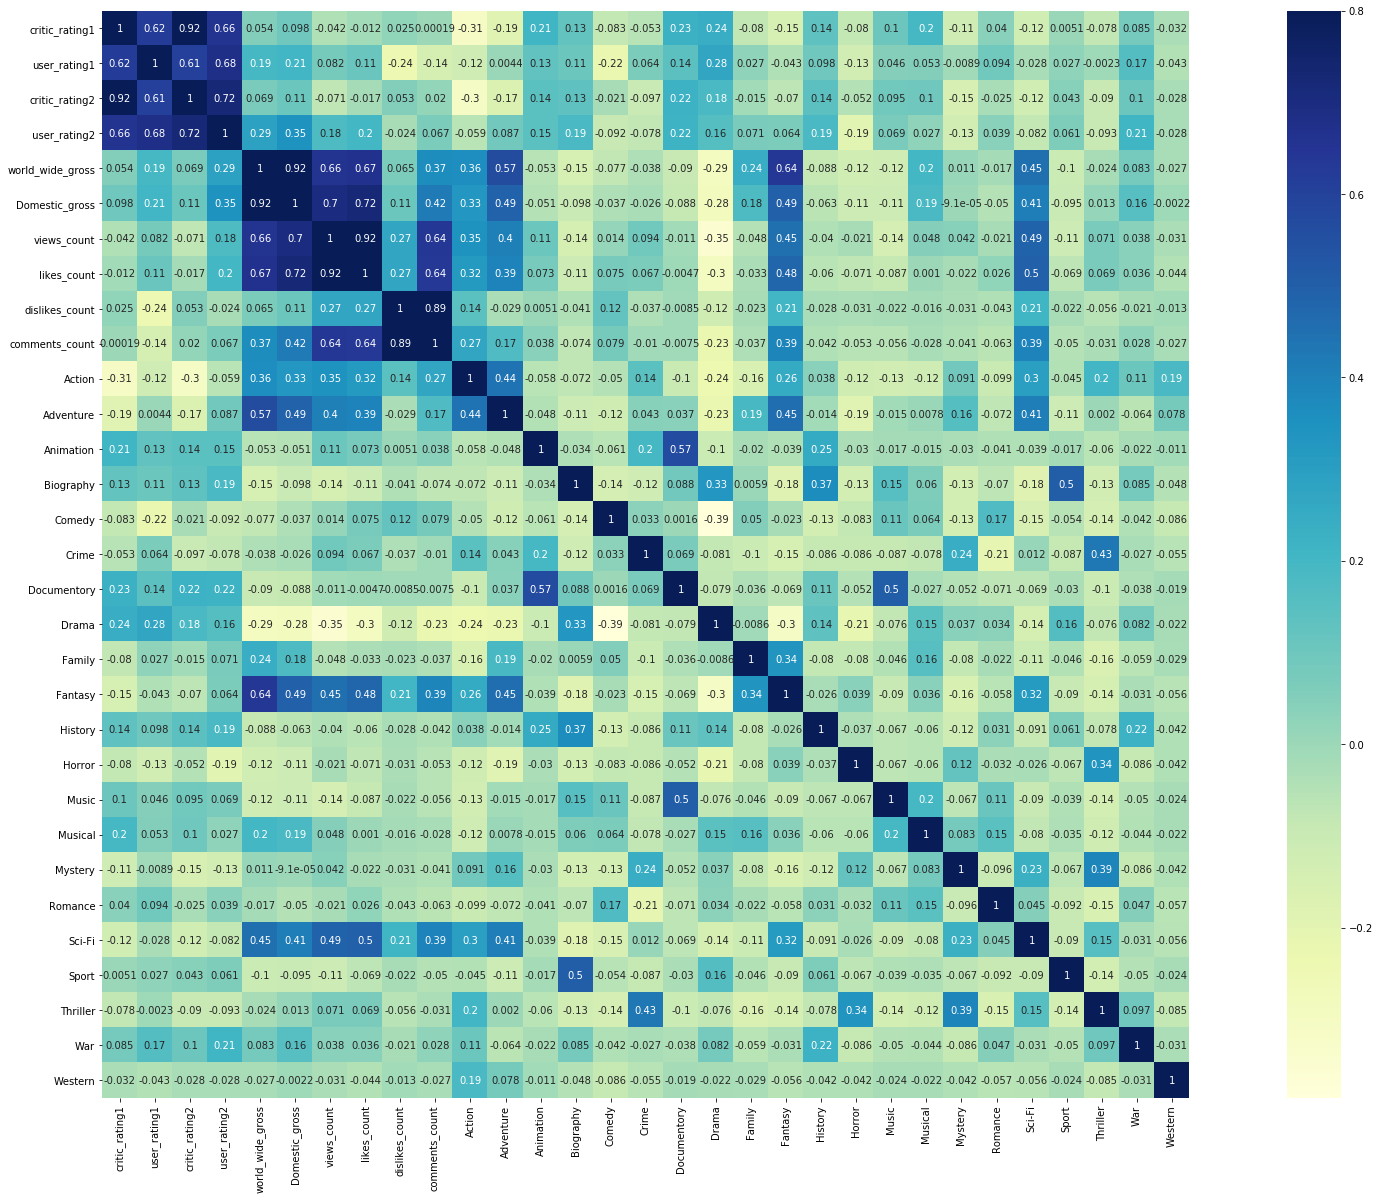

In [9]:
f ,ax = plt.subplots(figsize = (35,20))
sns.heatmap(corrmat,vmax=.8,square=True,cbar=True,annot=True,cmap='YlGnBu')

In [10]:
cols = corrmat.nlargest(15,'world_wide_gross')['world_wide_gross'].index
cols

Index(['world_wide_gross', 'Domestic_gross', 'likes_count', 'views_count',
       'Fantasy', 'Adventure', 'Sci-Fi', 'comments_count', 'Action',
       ' user_rating2', 'Family', 'Musical', 'user_rating1', 'War',
       'critic_rating2'],
      dtype='object')

In [11]:
cm=np.corrcoef(df_train[cols].values.T)

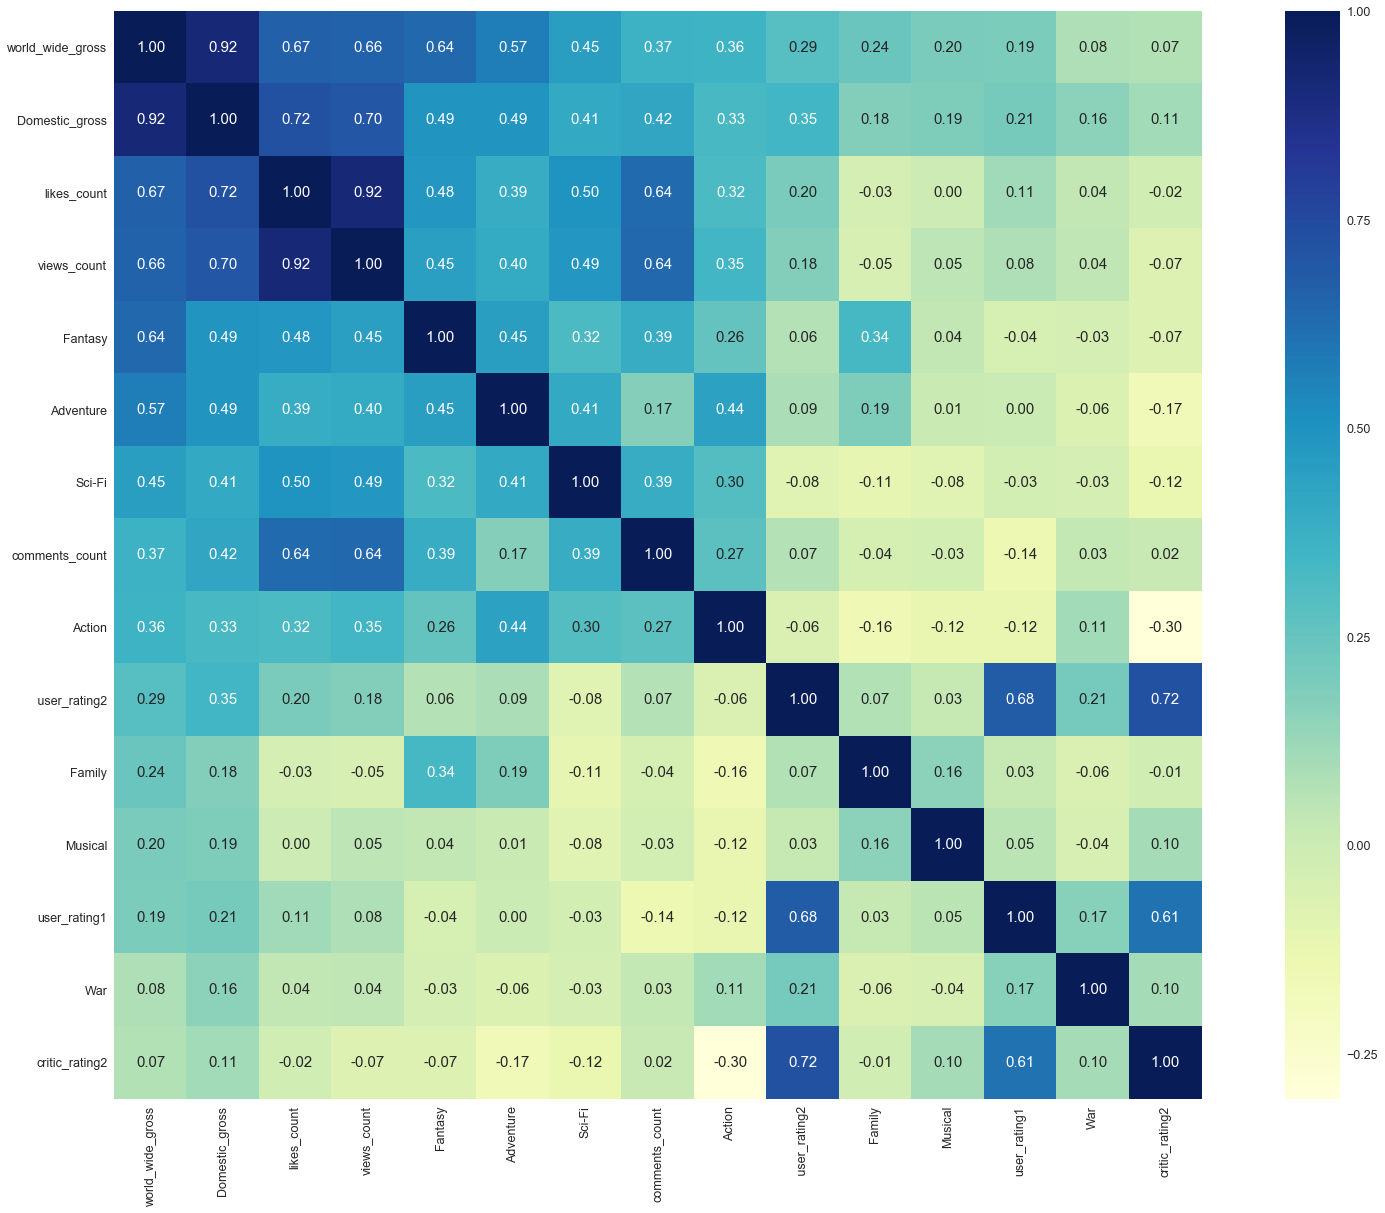

In [12]:
sns.set(font_scale=1.25)#font size in graph
f,ax = plt.subplots(figsize = (30,20))#setting size of graph
hm = sns.heatmap(cm,cbar = True,annot=True,square=True,fmt = '.2f',yticklabels=cols.values,xticklabels=cols.values,cmap='YlGnBu')
#annot for getting corresponding values on graph
plt.show()

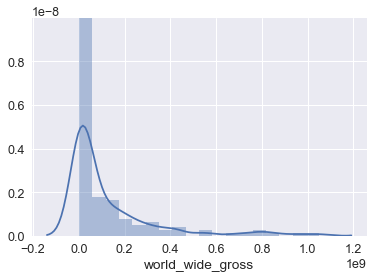

In [13]:
sns.distplot(df_train['world_wide_gross'])

In [14]:
print("skewness %f" % df_train['world_wide_gross'].skew())
print("kurtosis %f" % df_train['world_wide_gross'].kurt())

skewness 2.488614
kurtosis 6.336325


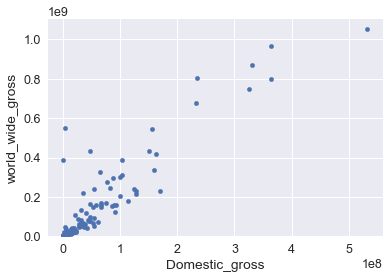

In [15]:
var = 'Domestic_gross'
data = pd.concat([df_train['world_wide_gross'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='world_wide_gross',ylim=(0.800000))

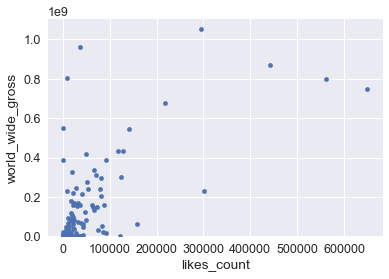

In [16]:
var = 'likes_count'
data = pd.concat([df_train['world_wide_gross'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='world_wide_gross',ylim=(0.800000))

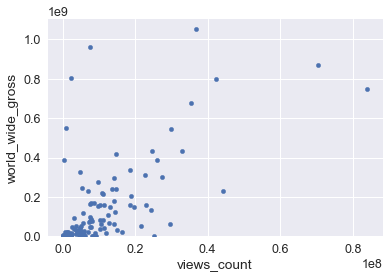

In [17]:
var = 'views_count'
data = pd.concat([df_train['world_wide_gross'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='world_wide_gross',ylim=(0.800000))

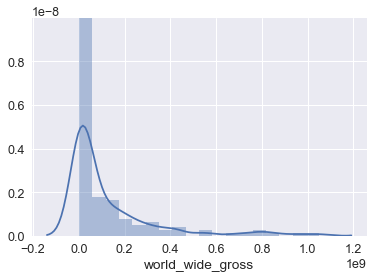

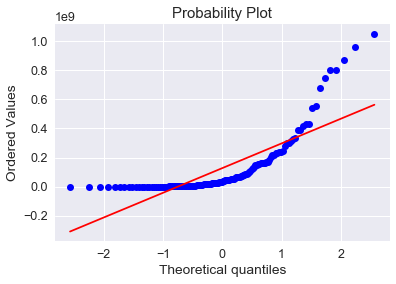

In [18]:
sns.distplot(df_train['world_wide_gross']);
fig = plt.figure()
res = stats.probplot(df_train['world_wide_gross'], plot=plt)

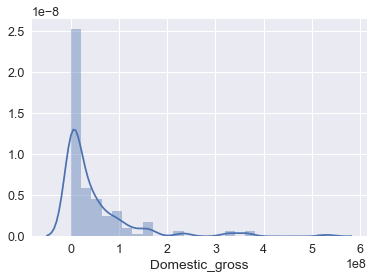

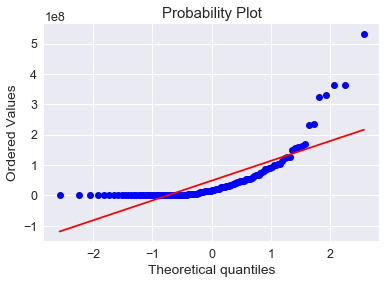

In [19]:
sns.distplot(df_train['Domestic_gross']);
fig = plt.figure()
res = stats.probplot(df_train['Domestic_gross'], plot=plt)


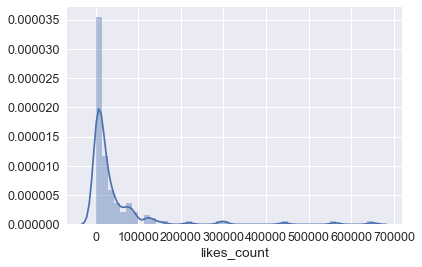

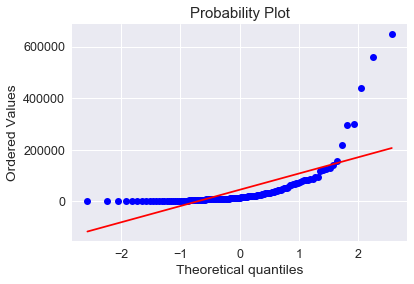

In [20]:
sns.distplot(df_train['likes_count']);
fig = plt.figure()
res = stats.probplot(df_train['likes_count'], plot=plt)

In [21]:
df_train['world_wide_gross'] = np.log(df_train['world_wide_gross'])


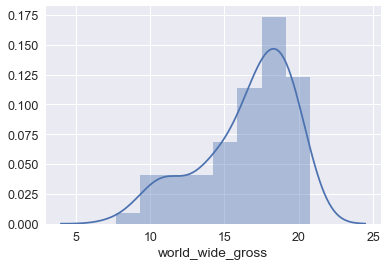

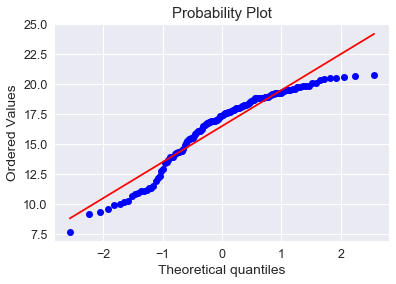

In [22]:
sns.distplot(df_train['world_wide_gross']);
fig = plt.figure()
res = stats.probplot(df_train['world_wide_gross'], plot=plt)

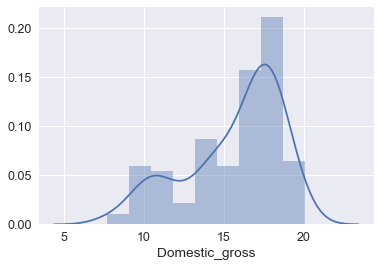

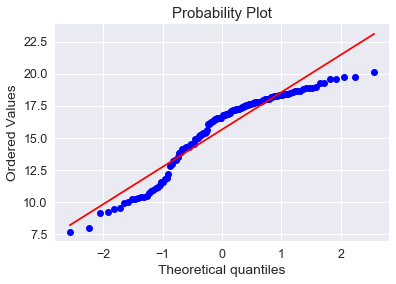

In [23]:
df_train['Domestic_gross'] = np.log(df_train['Domestic_gross'])
sns.distplot(df_train['Domestic_gross']);
fig = plt.figure()
res = stats.probplot(df_train['Domestic_gross'], plot=plt)

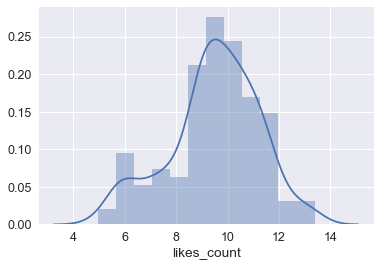

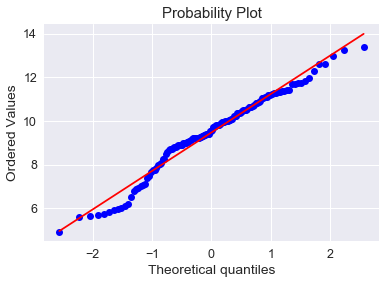

In [24]:
df_train['likes_count'] = np.log(df_train['likes_count'])
sns.distplot(df_train['likes_count']);
fig = plt.figure()
res = stats.probplot(df_train['likes_count'], plot=plt)

In [25]:
y = df_train['world_wide_gross']
x = df_train
del df_train['world_wide_gross']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [27]:
from xgboost.sklearn import XGBRegressor
clf=XGBRegressor()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print(r2_score(y_test,prediction))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
predict = GradientBoostingRegressor()
predict.fit(x_train,y_train)
pred = predict.predict(x_test)
print(r2_score(y_test,pred))